In [1]:
import os
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import struct
import cv2
from numpy import expand_dims
import tensorflow as tf
import keras
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.patches import Rectangle
%matplotlib inline

C:\Users\ahmed\Anaconda3\envs\deeplearning_GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ahmed\Anaconda3\envs\deeplearning_GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ahmed\Anaconda3\envs\deeplearning_GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ahmed\Anaconda3\envs\deeplearni

In [2]:
df=pd.read_csv("MNIST_train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels=df['label']
features=df.iloc[:,1:]
features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features=np.array(features).reshape(-1,28,28,1)
features.shape

(42000, 28, 28, 1)

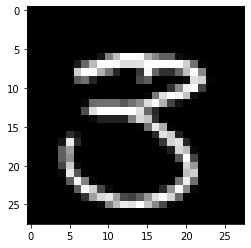

3


In [5]:
new_array = cv2.resize(features[7], (28, 28))
plt.imshow(new_array, cmap='gray')
plt.show()
print(labels[7])

In [6]:
from keras.utils import to_categorical
labels=to_categorical(labels)
labels.shape

(42000, 10)

In [7]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [35]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Input, Lambda, Conv2D, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D

clf = Sequential()

clf.add(Convolution2D(filters=64, kernel_size=3, padding='same', input_shape=X_train.shape[1:]))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(Convolution2D(filters=64, kernel_size=5, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(MaxPooling2D(pool_size=2))

clf.add(Convolution2D(filters=64, kernel_size=1, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))

clf.add(Convolution2D(filters=64, kernel_size=3, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(Convolution2D(filters=64, kernel_size=5, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(MaxPooling2D(pool_size=2))
clf.add(Dropout(.2))

clf.add(Convolution2D(filters=64, kernel_size=1, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))

clf.add(Convolution2D(filters=128, kernel_size=3, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(Convolution2D(filters=128, kernel_size=5, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(MaxPooling2D(pool_size=2))

clf.add(Convolution2D(filters=128, kernel_size=1, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))

clf.add(Convolution2D(filters=128, kernel_size=3, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(Convolution2D(filters=128, kernel_size=5, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))
clf.add(MaxPooling2D(pool_size=2))

clf.add(Convolution2D(filters=128, kernel_size=1, padding='same'))
clf.add(BatchNormalization(epsilon=0.001))
clf.add(LeakyReLU(alpha=0.1))


clf.add(Flatten())
clf.add(Dropout(.2))
clf.add(Dense(128,activation='relu'))

clf.add(Dense(10, activation='softmax'))

clf.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_79 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_79 (LeakyReLU)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_80 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_80 (LeakyReLU)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 64)      

In [36]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping,LearningRateScheduler
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')

checkpoint_cb = ModelCheckpoint("MNIST_deepCNN_model2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=1)


def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)

history = clf.fit(
    X_train,y_train,
    epochs=50, batch_size=32,
    validation_split=.2,verbose=1, shuffle=True,
    callbacks=[checkpoint_cb, lr_scheduler]
)

Train on 26880 samples, validate on 6720 samples
Epoch 1/50
26880/26880 [==============================] - 21s 765us/step - loss: 0.2826 - accuracy: 0.9160 - val_loss: 0.1903 - val_accuracy: 0.9570
Epoch 2/50
26880/26880 [==============================] - 18s 665us/step - loss: 0.1154 - accuracy: 0.9702 - val_loss: 0.0875 - val_accuracy: 0.9784
Epoch 3/50
26880/26880 [==============================] - 18s 666us/step - loss: 0.0937 - accuracy: 0.9757 - val_loss: 0.1224 - val_accuracy: 0.9704
Epoch 4/50
26880/26880 [==============================] - 18s 670us/step - loss: 0.0724 - accuracy: 0.9804 - val_loss: 0.0662 - val_accuracy: 0.9844
Epoch 5/50
26880/26880 [==============================] - 18s 675us/step - loss: 0.0616 - accuracy: 0.9840 - val_loss: 0.0981 - val_accuracy: 0.9778
Epoch 6/50
26880/26880 [==============================] - 18s 666us/step - loss: 0.0566 - accuracy: 0.9842 - val_loss: 0.0615 - val_accuracy: 0.9857
Epoch 7/50
26880/26880 [==============================] -

In [37]:
score = clf.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

8400/8400 [==============================] - 2s 200us/step
Test loss: 0.03211919179297814
Test accuracy: 99.5119035243988


In [38]:
clf.save('MNIST_deepCNN_model.h5')

In [8]:
from keras.models import load_model
clf = load_model('MNIST_deepCNN_model_99.5.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


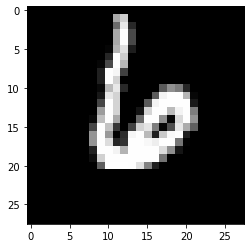

6


In [10]:
pred=clf.predict(x_test[1:2])
new_array = cv2.resize(x_test[1], (28, 28))
plt.imshow(new_array, cmap='gray')
plt.show()
print(np.argmax(pred))

In [11]:
df=pd.read_csv("test.csv")
test=np.array(df).reshape(-1,28,28,1)
test.shape

(28000, 28, 28, 1)

In [12]:
labels=[]
pred=clf.predict(test,verbose=1)
for i in range(len(test)):
    labels.append(np.argmax(pred[i]))


28000/28000 [==============================] - 4s 157us/step


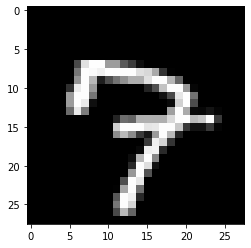

7


In [13]:
new_array = cv2.resize(test[5], (28, 28))
plt.imshow(new_array, cmap='gray')
plt.show()
print(labels[5])

In [14]:
df=pd.read_csv("sample_submission.csv")
df['Label']=labels
pd.DataFrame.to_csv(df,"sample_submission.csv")